In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#dataset criado por mim mesmo com alguns alimentos da minha dieta
alimentos = pd.read_csv('alimentos.csv', sep=',')
alimentos

,Alimento,Calorias (Kcal),Porção (g),Colheres de Sopa,Unidade,Carboidratos (g),Proteínas (g),Gorduras (g),Fonte dos Dados
0,Arroz Branco,97.00,100.00,6.6,NaN,26.30,2.60,0.20,(TACO)
1,Feijão Preto,132.00,100.00,6.6,NaN,15.40,9.00,1.40,(TACO)
2,Filé de Frango (grelhado),165.00,100.00,NaN,1.0,0.00,31.00,3.60,(TACO)
3,Filé de Contrafilé (grelhado),194.00,100.00,NaN,1.0,0.00,35.00,4.50,(TACO)
4,Filé de Pescada Frito (Tilápia),171.00,100.00,NaN,1.0,0.00,28.60,8.10,(TACO)
5,Ovo de Galinha Frito,95.00,50.00,NaN,1.0,5.50,6.30,6.80,(TACO)
6,Ovo de Galinha Cozido,78.00,50.00,NaN,1.0,5.50,6.30,5.30,(TACO)
7,Azeite de Oliva Extra Virgem,117.87,13.33,1.0,NaN,0.00,0.00,13.33,(FatSecret)
8,Banana Nanica,92.00,100.00,NaN,1.0,23.80,1.40,0.40,(TACO)
9,Maçã Fuji,18.00,182.00,NaN,1.0,4.83,0.09,0.06,(TACO)


In [ ]:
#bloco pronto caso eu queira adicionar um novo alimento

novo_alimento = pd.DataFrame([
    {
        'Alimento': ,
        'Calorias (Kcal)': ,
        'Porção (g)': ,
        'Colheres de Sopa': ,
        'Unidade': ,
        'Carboidratos (g)': ,
        'Proteínas (g)': ,
        'Gorduras (g)': ,
        'Fonte dos Dados': 
    }
])

   

alimentos = pd.concat([alimentos, novo_alimento], ignore_index=True)
alimentos.to_csv('alimentos.csv', index=False)

### Função para calcular os macros da refeição

In [3]:
def refeicao(dicionario):
    
    nomes_alimentos = list(dicionario.keys())
    medidas_alimentos = list(dicionario.values())
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(dicionario)):
        indice = alimentos.loc[alimentos['Alimento'] == nomes_alimentos[i]].index[0]
        
        if (np.isnan(alimentos.loc[indice, 'Unidade'])):
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Colheres de Sopa']
        else:
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Unidade']
            
        medidas_alimentos[i] = aux
   
        calt = calt + medidas_alimentos[i] * alimentos.loc[indice,'Calorias (Kcal)']
        carb = carb + medidas_alimentos[i] * alimentos.loc[indice,'Carboidratos (g)']
        prot = prot + medidas_alimentos[i] * alimentos.loc[indice,'Proteínas (g)']
        gord = gord + medidas_alimentos[i] * alimentos.loc[indice,'Gorduras (g)']


        
    informacoes = {'Calorias (Kcal)': round(calt, 2),
                   'Carboidratos (g)': round(carb, 2),
                   'Proteínas (g)': round(prot, 2),
                   'Gorduras (g)': round(gord, 2)}
    
    return informacoes

## Função para calcular os macros de sua alimentação em um dia

In [4]:
def valor_diario(refeicoes):
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(refeicoes)):
        calt = calt + refeicoes[i]['Calorias (Kcal)']
        carb = carb + refeicoes[i]['Carboidratos (g)']
        prot = prot + refeicoes[i]['Proteínas (g)']
        gord = gord + refeicoes[i]['Gorduras (g)']
    
    return [round(calt, 2),round(carb, 2),round(prot, 2),round(gord, 2)]

In [5]:
#criando dicionarios com todas as refeicoes do dia
#lembrando que passamos o valor da quantidade de colheres de sopa ou de unidades do alimento
#09/07: 

cafe_da_manha = {
    'Hipercalórico': 1,
    'Ovo de Galinha Frito': 3,
    'Azeite de Oliva Extra Virgem': 1
}

almoco = {
    'Arroz Branco': 10,
    'Feijão Preto': 6,
    'Filé de Pescada Frito (Tilápia)': 1,
    'Azeite de Oliva Extra Virgem': 1
}

cafe_da_tarde = {
    'Banana Nanica': 1,
    'Maçã Fuji': 1,
    'Aveia em Flocos (Nestlé)': 3,
    'Hipercalórico': 1
}

janta = {
    'Arroz Branco': 8,
    'Feijão Preto': 6,
    'Filé de Pescada Frito (Tilápia)': 1,
    'Azeite de Oliva Extra Virgem': 1,
    'Pão de Milho': 2
}

In [6]:
#criando dicionarios com os macros de cada refeicao

manha_valores = refeicao(cafe_da_manha)
almoco_valores = refeicao(almoco)
tarde_valores = refeicao(cafe_da_tarde)
janta_valores = refeicao(janta)

In [7]:
#passando todas as refeicoes em uma so lista para obter um dicionario com os macros totais do dia
refeicoes = [manha_valores, almoco_valores, tarde_valores, janta_valores]
valores_diarios = valor_diario(refeicoes)
valores_diarios

[2314.16, 288.86, 121.74, 85.95]

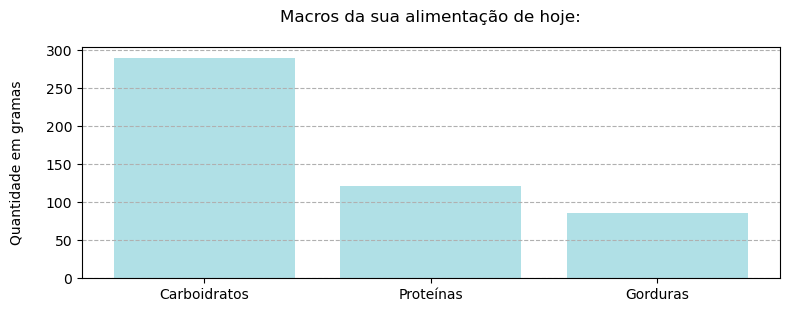

In [8]:
plt.figure(figsize=(9,3))
plt.bar(['Carboidratos', 'Proteínas', 'Gorduras'], valores_diarios[1:], color='powderblue')
plt.title('Macros da sua alimentação de hoje:\n')
plt.ylabel('Quantidade em gramas\n')
plt.grid(axis='y', linestyle='--')
plt.show()

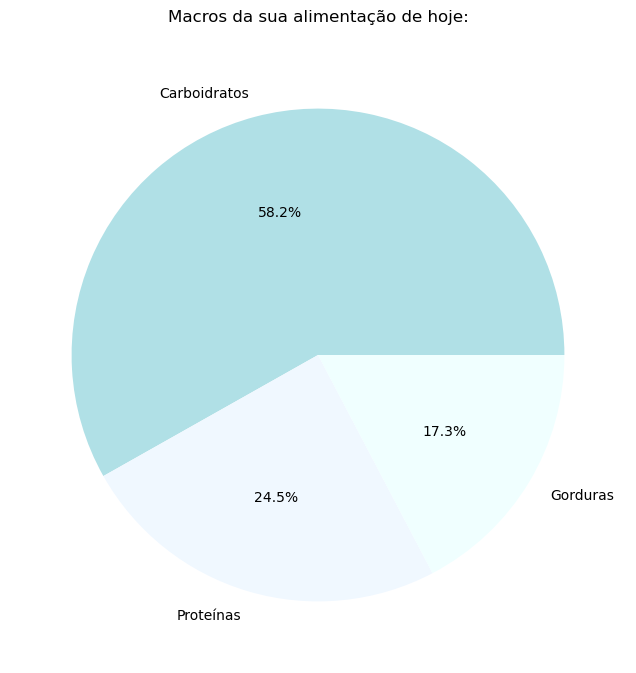

In [9]:
plt.figure(figsize=(10, 8))
plt.pie(
    valores_diarios[1:], 
    labels=['Carboidratos', 'Proteínas', 'Gorduras'], 
    autopct="%1.1f%%", 
    colors=['powderblue', 'aliceblue', 'azure']
)
plt.title('Macros da sua alimentação de hoje:\n')
plt.show()


In [10]:
print('Calorias (Kcal):',valores_diarios[0],
      '\nCarboidratos (g):',valores_diarios[1],
      '\nProteínas (g):',valores_diarios[2],
      '\nGorduras (g):',valores_diarios[3])

Calorias (Kcal): 2314.16 
Carboidratos (g): 288.86 
Proteínas (g): 121.74 
Gorduras (g): 85.95


---

### Registro de refeições

In [11]:
def add_refeicoes(valores_diarios, data_string):
    
    
    data = datetime.date(year = int(data_string[4:8]),
                         month = int(data_string[2:4]),
                         day = int(data_string[0:2]))
    
    data_br = data.strftime("%d-%m-%Y")
    g_total = valores_diarios[1] + valores_diarios[2] + valores_diarios[3]
    relacao_valores = [
        round(valores_diarios[1]*100/g_total,2),
        round(valores_diarios[2]*100/g_total,2),
        round(valores_diarios[3]*100/g_total,2)
    ]
    
    nova_linha = {
        'Data': data_br,
        'Kcal': valores_diarios[0],
        'Carb': valores_diarios[1],
        'Prot': valores_diarios[2],
        'Gord': valores_diarios[3],
        'relacao(%)': str(relacao_valores[0])+'/'+str(relacao_valores[1])+'/'+str(relacao_valores[2])
    }
    return nova_linha

In [21]:
#importar dataset com macros_diarios
macros_diarios = pd.read_csv('macros_diarios.csv')
macros_diarios

,Data,Kcal,Carb,Prot,Gord,relacao(%)
0,08-07-2024,1660.97,156.78,105.54,75.95,46/31/23
1,09-07-2024,2314.16,288.86,121.74,85.95,58/25/17


In [ ]:
nova_linha = add_refeicoes(valores_diarios, '09072024')
nova_linha = pd.DataFrame([nova_linha])
macros_diarios = pd.concat([macros_diarios, nova_linha], ignore_index=True)

In [20]:
#salvar o dataframe atualizado
macros_diarios.to_csv('macros_diarios.csv', index=False)